In [4]:
from pathlib import Path
from freqtrade.configuration import Configuration

# Customize these according to your needs.

# Initialize empty configuration object
path='F:\\Projects\\freqtrade\\'

config = Configuration.from_files([path + "config_binance_test.json"])

# Optionally, use existing configuration file
# config = Configuration.from_files(["config.json"])

# Define some constants
config["timeframe"] = "4h"
# Name of the strategy class
config["strategy"] = "YoyoActionStrategy"
# Location of the data
data_location = Path(config['user_data_dir'], 'data', 'binance')
# Pair to analyze - Only use one pair here
pair = "BTC/USDT"

# if backtest_dir points to a directory, it'll automatically load the last backtest file.
backtest_dir = config["user_data_dir"] / "backtest_results/backtest-result-2021-04-21_17-06-51.json"

In [6]:
from freqtrade.data.history import load_pair_history

candles = load_pair_history(datadir=data_location,
                            timeframe=config["timeframe"],
                            pair=pair)

# Confirm success
print("Loaded " + str(len(candles)) + f" rows of data for {pair} from {data_location}")
candles.head()

Loaded 8040 rows of data for BTC/USDT from F:\Projects\freqtrade\user_data\data\binance


,date,open,high,low,close,volume
0,2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865
1,2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882
2,2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001
3,2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716
4,2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913


In [8]:
# Load strategy using values set above
from freqtrade.resolvers import StrategyResolver
strategy = StrategyResolver.load_strategy(config)

# Generate buy/sell signals using strategy 
df = strategy.analyze_ticker(candles, {'pair': pair})
df.tail()

C:\Users\Freshconsulting\Anaconda3\envs\tensorflow_freqtrade\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,date,open,high,low,close,volume,ohlc4,ema_fast,ema_slow,rsi,...,greenLine,greenLine_last,short_last,green_last,red_last,hold_state,signal_buy,signal_sell,buy,sell
8035,2021-04-17 08:00:00+00:00,62114.99,62458.28,60700.55,60886.91,11323.908231,61540.1825,61653.00761654,61986.06375243,43.52519143,...,False,False,True,False,False,False,NaN,True,NaN,1.0
8036,2021-04-17 12:00:00+00:00,60886.93,61222.00,60094.00,60264.66,13371.078768,60616.8975,61256.33686896,61804.86335744,40.20974269,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
8037,2021-04-17 16:00:00+00:00,60264.65,60785.00,59580.91,60705.02,10217.080882,60333.8950,61098.81776354,61689.09037245,43.49033314,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
8038,2021-04-17 20:00:00+00:00,60705.02,60955.00,59969.98,60006.66,5977.350070,60409.1650,60786.77268824,61511.99243851,39.76410860,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
8039,2021-04-18 00:00:00+00:00,60006.67,60499.00,50931.30,55014.46,28130.890376,56612.8575,59137.54049160,60828.04165550,23.96021053,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN


In [10]:
print(f"Generated {df['buy'].sum()} buy signals")
data = df.set_index('date', drop=False)
data.tail()

Generated 725.0 buy signals


,date,open,high,low,close,volume,ohlc4,ema_fast,ema_slow,rsi,...,greenLine,greenLine_last,short_last,green_last,red_last,hold_state,signal_buy,signal_sell,buy,sell
date,,,,,,,,,,,,,,,,,,,,,
2021-04-17 08:00:00+00:00,2021-04-17 08:00:00+00:00,62114.99,62458.28,60700.55,60886.91,11323.908231,61540.1825,61653.00761654,61986.06375243,43.52519143,...,False,False,True,False,False,False,NaN,True,NaN,1.0
2021-04-17 12:00:00+00:00,2021-04-17 12:00:00+00:00,60886.93,61222.00,60094.00,60264.66,13371.078768,60616.8975,61256.33686896,61804.86335744,40.20974269,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
2021-04-17 16:00:00+00:00,2021-04-17 16:00:00+00:00,60264.65,60785.00,59580.91,60705.02,10217.080882,60333.8950,61098.81776354,61689.09037245,43.49033314,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
2021-04-17 20:00:00+00:00,2021-04-17 20:00:00+00:00,60705.02,60955.00,59969.98,60006.66,5977.350070,60409.1650,60786.77268824,61511.99243851,39.76410860,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
2021-04-18 00:00:00+00:00,2021-04-18 00:00:00+00:00,60006.67,60499.00,50931.30,55014.46,28130.890376,56612.8575,59137.54049160,60828.04165550,23.96021053,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN


In [12]:
from freqtrade.data.btanalysis import load_backtest_data, load_backtest_stats


In [14]:
backtest_dir

WindowsPath('F:/Projects/freqtrade/user_data/backtest_results/backtest-result-2021-04-21_17-06-51.json')

In [16]:
stats = load_backtest_stats(backtest_dir)

strategy = config["strategy"]
# All statistics are available per strategy, so if `--strategy-list` was used during backtest, this will be reflected here as well.
# Example usages:
print(stats['strategy'][strategy]['results_per_pair'])
# Get pairlist used for this backtest
print(stats['strategy'][strategy]['pairlist'])
# Get market change (average change of all pairs from start to end of the backtest period)
print(stats['strategy'][strategy]['market_change'])
# Maximum drawdown ()
print(stats['strategy'][strategy]['max_drawdown'])
# Maximum drawdown start and end
print(stats['strategy'][strategy]['drawdown_start'])
print(stats['strategy'][strategy]['drawdown_end'])

# Get strategy comparison (only relevant if multiple strategies were compared)
print(stats['strategy_comparison'])

[{'key': 'BTC/USDT', 'trades': 260, 'profit_mean': 0.014998368730769231, 'profit_mean_pct': 1.4998368730769231, 'profit_sum': 3.89957587, 'profit_sum_pct': 389.96, 'profit_total_abs': 390.34750753, 'profit_total': 0.389957587, 'profit_total_pct': 39.0, 'duration_avg': '2 days, 20:33:00', 'wins': 91, 'draws': 0, 'losses': 169}, {'key': 'BNB/USDT', 'trades': 278, 'profit_mean': 0.0237505795323741, 'profit_mean_pct': 2.37505795323741, 'profit_sum': 6.60266111, 'profit_sum_pct': 660.27, 'profit_total_abs': 660.9263794000001, 'profit_total': 0.660266111, 'profit_total_pct': 66.03, 'duration_avg': '2 days, 10:01:00', 'wins': 92, 'draws': 0, 'losses': 186}, {'key': 'BTT/USDT', 'trades': 197, 'profit_mean': 0.02123992294416244, 'profit_mean_pct': 2.123992294416244, 'profit_sum': 4.184264820000001, 'profit_sum_pct': 418.43, 'profit_total_abs': 418.84490338, 'profit_total': 0.4184264820000001, 'profit_total_pct': 41.84, 'duration_avg': '1 day, 20:06:00', 'wins': 54, 'draws': 0, 'losses': 143}, {

In [86]:
strategy_comparison = stats['strategy_comparison']
l# strategy_comparison.loc[(strategy_comparison['key'] == 'YoyoActionStrategy')]
strategy_comparison[[0]['key']
sstats['strategy']['YoyoActionStrategy'].keys()

dict_keys(['trades', 'locks', 'best_pair', 'worst_pair', 'results_per_pair', 'sell_reason_summary', 'left_open_trades', 'total_trades', 'profit_mean', 'profit_total', 'profit_total_abs', 'backtest_start', 'backtest_start_ts', 'backtest_end', 'backtest_end_ts', 'backtest_days', 'backtest_run_start_ts', 'backtest_run_end_ts', 'trades_per_day', 'market_change', 'pairlist', 'stake_amount', 'stake_currency', 'max_open_trades', 'max_open_trades_setting', 'timeframe', 'timerange', 'enable_protections', 'strategy_name', 'stoploss', 'trailing_stop', 'trailing_stop_positive', 'trailing_stop_positive_offset', 'trailing_only_offset_is_reached', 'use_custom_stoploss', 'minimal_roi', 'use_sell_signal', 'sell_profit_only', 'sell_profit_offset', 'ignore_roi_if_buy_signal', 'backtest_best_day', 'backtest_worst_day', 'winning_days', 'draw_days', 'losing_days', 'winner_holding_avg', 'loser_holding_avg', 'max_drawdown', 'drawdown_start', 'drawdown_start_ts', 'drawdown_end', 'drawdown_end_ts'])

In [95]:
stats['strategy']['YoyoActionStrategy']['trades']

list

In [18]:
# Load data using values set above
from freqtrade.data.history import load_pair_history

candles = load_pair_history(datadir=data_location,
                            timeframe=config["timeframe"],
                            pair=pair)

# Confirm success
print("Loaded " + str(len(candles)) + f" rows of data for {pair} from {data_location}")
candles.head()

Loaded 8040 rows of data for BTC/USDT from F:\Projects\freqtrade\user_data\data\binance


,date,open,high,low,close,volume
0,2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865
1,2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882
2,2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001
3,2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716
4,2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913


In [20]:
# Load strategy using values set above
from freqtrade.resolvers import StrategyResolver
strategy = StrategyResolver.load_strategy(config)

# Generate buy/sell signals using strategy
df = strategy.analyze_ticker(candles, {'pair': pair})
df.tail()

C:\Users\Freshconsulting\Anaconda3\envs\tensorflow_freqtrade\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,date,open,high,low,close,volume,ohlc4,ema_fast,ema_slow,rsi,...,greenLine,greenLine_last,short_last,green_last,red_last,hold_state,signal_buy,signal_sell,buy,sell
8035,2021-04-17 08:00:00+00:00,62114.99,62458.28,60700.55,60886.91,11323.908231,61540.1825,61653.00761654,61986.06375243,43.52519143,...,False,False,True,False,False,False,NaN,True,NaN,1.0
8036,2021-04-17 12:00:00+00:00,60886.93,61222.00,60094.00,60264.66,13371.078768,60616.8975,61256.33686896,61804.86335744,40.20974269,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
8037,2021-04-17 16:00:00+00:00,60264.65,60785.00,59580.91,60705.02,10217.080882,60333.8950,61098.81776354,61689.09037245,43.49033314,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
8038,2021-04-17 20:00:00+00:00,60705.02,60955.00,59969.98,60006.66,5977.350070,60409.1650,60786.77268824,61511.99243851,39.76410860,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
8039,2021-04-18 00:00:00+00:00,60006.67,60499.00,50931.30,55014.46,28130.890376,56612.8575,59137.54049160,60828.04165550,23.96021053,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN


In [22]:
# Report results
print(f"Generated {df['buy'].sum()} buy signals")
data = df.set_index('date', drop=False)
data.tail()

Generated 725.0 buy signals


,date,open,high,low,close,volume,ohlc4,ema_fast,ema_slow,rsi,...,greenLine,greenLine_last,short_last,green_last,red_last,hold_state,signal_buy,signal_sell,buy,sell
date,,,,,,,,,,,,,,,,,,,,,
2021-04-17 08:00:00+00:00,2021-04-17 08:00:00+00:00,62114.99,62458.28,60700.55,60886.91,11323.908231,61540.1825,61653.00761654,61986.06375243,43.52519143,...,False,False,True,False,False,False,NaN,True,NaN,1.0
2021-04-17 12:00:00+00:00,2021-04-17 12:00:00+00:00,60886.93,61222.00,60094.00,60264.66,13371.078768,60616.8975,61256.33686896,61804.86335744,40.20974269,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
2021-04-17 16:00:00+00:00,2021-04-17 16:00:00+00:00,60264.65,60785.00,59580.91,60705.02,10217.080882,60333.8950,61098.81776354,61689.09037245,43.49033314,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
2021-04-17 20:00:00+00:00,2021-04-17 20:00:00+00:00,60705.02,60955.00,59969.98,60006.66,5977.350070,60409.1650,60786.77268824,61511.99243851,39.76410860,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN
2021-04-18 00:00:00+00:00,2021-04-18 00:00:00+00:00,60006.67,60499.00,50931.30,55014.46,28130.890376,56612.8575,59137.54049160,60828.04165550,23.96021053,...,False,False,True,False,True,False,NaN,NaN,NaN,NaN


In [24]:
trades = load_backtest_data(backtest_dir)

# Show value-counts per pair
trades.groupby("pair")["sell_reason"].value_counts()

pair       sell_reason
BNB/USDT   sell_signal    276
           stop_loss        2
BTC/USDT   sell_signal    259
           stop_loss        1
BTT/USDT   sell_signal    195
           stop_loss        2
DOT/USDT   sell_signal     53
EOS/USDT   sell_signal    238
ETH/USDT   sell_signal    299
IOST/USDT  sell_signal    155
           stop_loss        2
           force_sell       1
KNC/USDT   sell_signal     75
           stop_loss        1
LINK/USDT  sell_signal    177
           stop_loss        1
NEAR/USDT  sell_signal     33
OMG/USDT   sell_signal    144
REEF/USDT  sell_signal     13
           stop_loss        3
RSR/USDT   sell_signal     38
RUNE/USDT  sell_signal     38
           stop_loss        1
Name: sell_reason, dtype: int64

In [26]:
trades

,pair,stake_amount,amount,open_date,close_date,open_rate,close_rate,fee_open,fee_close,trade_duration,...,sell_reason,initial_stop_loss_abs,initial_stop_loss_ratio,stop_loss_abs,stop_loss_ratio,min_rate,max_rate,is_open,open_timestamp,close_timestamp
0,ETH/USDT,100,0.33886818,2017-08-20 16:00:00+00:00,2017-08-22 04:00:00+00:00,295.1000000,144.21000000,0.001,0.001,2160,...,sell_signal,236.08000000,-0.2,236.08000000,-0.2,295.1000000,346.52000,False,1.50324480e+12,1.50337440e+12
1,BTC/USDT,100,0.02402928,2017-08-20 20:00:00+00:00,2017-08-21 04:00:00+00:00,4161.5900000,4079.26000000,0.001,0.001,480,...,sell_signal,3329.27200000,-0.2,3329.27200000,-0.2,4104.6800000,4171.62000,False,1.50325920e+12,1.50328800e+12
2,ETH/USDT,100,0.32778288,2017-08-22 16:00:00+00:00,2017-09-02 08:00:00+00:00,305.0800000,364.83000000,0.001,0.001,15360,...,sell_signal,244.06400000,-0.2,244.06400000,-0.2,305.0800000,394.39000,False,1.50341760e+12,1.50433920e+12
3,BTC/USDT,100,0.02377567,2017-08-23 12:00:00+00:00,2017-09-02 12:00:00+00:00,4205.9800000,4669.75000000,0.001,0.001,14400,...,sell_signal,3364.78400000,-0.2,3364.78400000,-0.2,4177.6400000,4939.19000,False,1.50348960e+12,1.50435360e+12
4,BTC/USDT,100,0.02251193,2017-09-05 20:00:00+00:00,2017-09-08 16:00:00+00:00,4442.0900000,4330.68000000,0.001,0.001,4080,...,sell_signal,3553.67200000,-0.2,3553.67200000,-0.2,4396.4900000,4788.59000,False,1.50464160e+12,1.50488640e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,ETH/USDT,100,0.04128171,2021-04-17 00:00:00+00:00,2021-04-17 20:00:00+00:00,2422.3800000,2378.65000000,0.001,0.001,1200,...,sell_signal,1937.90400000,-0.2,1937.90400000,-0.2,2384.2500000,2495.00000,False,1.61861760e+12,1.61868960e+12
2003,BTT/USDT,100,10567.58498980,2021-04-17 04:00:00+00:00,2021-04-18 00:00:00+00:00,0.0094629,0.00757032,0.001,0.001,1200,...,stop_loss,0.00757032,-0.2,0.00757032,-0.2,0.0092515,0.01094,False,1.61863200e+12,1.61870400e+12
2004,DOT/USDT,100,2.31186612,2021-04-17 04:00:00+00:00,2021-04-18 00:00:00+00:00,43.2551000,42.05680000,0.001,0.001,1200,...,sell_signal,34.60408000,-0.2,34.60408000,-0.2,42.7051000,48.36000,False,1.61863200e+12,1.61870400e+12
2005,BNB/USDT,100,0.18805515,2021-04-19 04:00:00+00:00,2021-04-19 20:00:00+00:00,531.7589000,504.86460000,0.001,0.001,960,...,sell_signal,425.40712000,-0.2,425.40712000,-0.2,510.4000000,540.00000,False,1.61880480e+12,1.61886240e+12


<AxesSubplot:xlabel='date'>

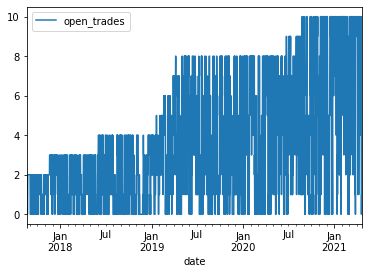

In [28]:
from freqtrade.data.btanalysis import analyze_trade_parallelism

# Analyze the above
parallel_trades = analyze_trade_parallelism(trades, '4h')

parallel_trades.plot()

In [30]:
from freqtrade.plot.plotting import  generate_candlestick_graph
# Limit graph period to keep plotly quick and reactive

# Filter trades to one pair
trades_red = trades.loc[trades['pair'] == pair]
data.set_index('date', drop=False)
data_red = data['2017-01-01':'2021-06-10']
# Generate candlestick graph
graph = generate_candlestick_graph(pair=pair,
                                   data=data_red,
                                   trades=trades_red,
                                   indicators1=['ema_fast', 'ema_slow', 'trail2','greenLine'],
                                   indicators2=['rsi']
                                  )

graph.show(renderer="browser")


f:\projects\freqtrade\freqtrade\plot\plotting.py:178: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
 trades.loc[trades['pair'] == pair]

,pair,stake_amount,amount,open_date,close_date,open_rate,close_rate,fee_open,fee_close,trade_duration,...,sell_reason,initial_stop_loss_abs,initial_stop_loss_ratio,stop_loss_abs,stop_loss_ratio,min_rate,max_rate,is_open,open_timestamp,close_timestamp
1,BTC/USDT,100,0.02402928,2017-08-20 20:00:00+00:00,2017-08-21 04:00:00+00:00,4161.59,4079.26,0.001,0.001,480,...,sell_signal,3329.272,-0.2,3329.272,-0.2,4104.68,4171.62,False,1.50325920e+12,1.50328800e+12
3,BTC/USDT,100,0.02377567,2017-08-23 12:00:00+00:00,2017-09-02 12:00:00+00:00,4205.98,4669.75,0.001,0.001,14400,...,sell_signal,3364.784,-0.2,3364.784,-0.2,4177.64,4939.19,False,1.50348960e+12,1.50435360e+12
4,BTC/USDT,100,0.02251193,2017-09-05 20:00:00+00:00,2017-09-08 16:00:00+00:00,4442.09,4330.68,0.001,0.001,4080,...,sell_signal,3553.672,-0.2,3553.672,-0.2,4396.49,4788.59,False,1.50464160e+12,1.50488640e+12
6,BTC/USDT,100,0.02293031,2017-09-12 08:00:00+00:00,2017-09-12 20:00:00+00:00,4361.04,4158.27,0.001,0.001,720,...,sell_signal,3488.832,-0.2,3488.832,-0.2,4202.53,4373.67,False,1.50520320e+12,1.50524640e+12
8,BTC/USDT,100,0.02701024,2017-09-15 20:00:00+00:00,2017-09-16 16:00:00+00:00,3702.30,3567.03,0.001,0.001,1200,...,sell_signal,2961.840,-0.2,2961.840,-0.2,3702.30,3950.00,False,1.50550560e+12,1.50557760e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,BTC/USDT,100,0.00201811,2021-03-07 04:00:00+00:00,2021-03-15 08:00:00+00:00,49551.43,57789.75,0.001,0.001,11760,...,sell_signal,39641.144,-0.2,39641.144,-0.2,49551.43,61844.00,False,1.61508960e+12,1.61579520e+12
1923,BTC/USDT,100,0.00172809,2021-03-17 20:00:00+00:00,2021-03-21 08:00:00+00:00,57867.42,56972.68,0.001,0.001,5040,...,sell_signal,46293.936,-0.2,46293.936,-0.2,57325.45,60129.97,False,1.61601120e+12,1.61631360e+12
1949,BTC/USDT,100,0.00181734,2021-03-27 00:00:00+00:00,2021-04-04 00:00:00+00:00,55025.59,57051.95,0.001,0.001,11520,...,sell_signal,44020.472,-0.2,44020.472,-0.2,55025.59,60200.00,False,1.61680320e+12,1.61749440e+12
1976,BTC/USDT,100,0.00172184,2021-04-09 00:00:00+00:00,2021-04-14 20:00:00+00:00,58077.52,62150.03,0.001,0.001,8400,...,sell_signal,46462.016,-0.2,46462.016,-0.2,58077.52,64854.00,False,1.61792640e+12,1.61843040e+12


In [32]:
trades

,pair,stake_amount,amount,open_date,close_date,open_rate,close_rate,fee_open,fee_close,trade_duration,...,sell_reason,initial_stop_loss_abs,initial_stop_loss_ratio,stop_loss_abs,stop_loss_ratio,min_rate,max_rate,is_open,open_timestamp,close_timestamp
0,ETH/USDT,100,0.33886818,2017-08-20 16:00:00+00:00,2017-08-22 04:00:00+00:00,295.1000000,144.21000000,0.001,0.001,2160,...,sell_signal,236.08000000,-0.2,236.08000000,-0.2,295.1000000,346.52000,False,1.50324480e+12,1.50337440e+12
1,BTC/USDT,100,0.02402928,2017-08-20 20:00:00+00:00,2017-08-21 04:00:00+00:00,4161.5900000,4079.26000000,0.001,0.001,480,...,sell_signal,3329.27200000,-0.2,3329.27200000,-0.2,4104.6800000,4171.62000,False,1.50325920e+12,1.50328800e+12
2,ETH/USDT,100,0.32778288,2017-08-22 16:00:00+00:00,2017-09-02 08:00:00+00:00,305.0800000,364.83000000,0.001,0.001,15360,...,sell_signal,244.06400000,-0.2,244.06400000,-0.2,305.0800000,394.39000,False,1.50341760e+12,1.50433920e+12
3,BTC/USDT,100,0.02377567,2017-08-23 12:00:00+00:00,2017-09-02 12:00:00+00:00,4205.9800000,4669.75000000,0.001,0.001,14400,...,sell_signal,3364.78400000,-0.2,3364.78400000,-0.2,4177.6400000,4939.19000,False,1.50348960e+12,1.50435360e+12
4,BTC/USDT,100,0.02251193,2017-09-05 20:00:00+00:00,2017-09-08 16:00:00+00:00,4442.0900000,4330.68000000,0.001,0.001,4080,...,sell_signal,3553.67200000,-0.2,3553.67200000,-0.2,4396.4900000,4788.59000,False,1.50464160e+12,1.50488640e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,ETH/USDT,100,0.04128171,2021-04-17 00:00:00+00:00,2021-04-17 20:00:00+00:00,2422.3800000,2378.65000000,0.001,0.001,1200,...,sell_signal,1937.90400000,-0.2,1937.90400000,-0.2,2384.2500000,2495.00000,False,1.61861760e+12,1.61868960e+12
2003,BTT/USDT,100,10567.58498980,2021-04-17 04:00:00+00:00,2021-04-18 00:00:00+00:00,0.0094629,0.00757032,0.001,0.001,1200,...,stop_loss,0.00757032,-0.2,0.00757032,-0.2,0.0092515,0.01094,False,1.61863200e+12,1.61870400e+12
2004,DOT/USDT,100,2.31186612,2021-04-17 04:00:00+00:00,2021-04-18 00:00:00+00:00,43.2551000,42.05680000,0.001,0.001,1200,...,sell_signal,34.60408000,-0.2,34.60408000,-0.2,42.7051000,48.36000,False,1.61863200e+12,1.61870400e+12
2005,BNB/USDT,100,0.18805515,2021-04-19 04:00:00+00:00,2021-04-19 20:00:00+00:00,531.7589000,504.86460000,0.001,0.001,960,...,sell_signal,425.40712000,-0.2,425.40712000,-0.2,510.4000000,540.00000,False,1.61880480e+12,1.61886240e+12
